In [2]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from vinzy_imgdata_importer import img_data_importer 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Dense,Flatten

In [4]:
x_path = r'Labelled_Data/X_categories.pickle'
y_path = r'Labelled_Data/y_labels.pickle'

In [15]:
with open(x_path,'rb') as file:
    X_data = pickle.load(file)

with open(y_path,'rb') as file:
    Y_data = pickle.load(file)

<Axes: xlabel='count'>

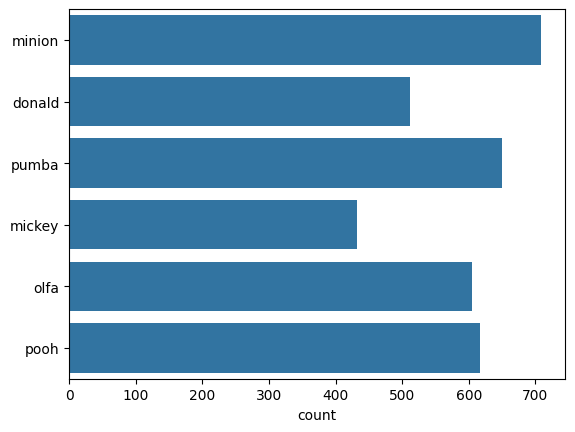

In [18]:
mappings = {0:'donald',1:'mickey',2:'minion',3:'olfa',4:'pooh',5:'pumba'}
Y_data_count = pd.Series(Y_data)
img_count = Y_data_count.map(mappings)
sns.countplot(img_count)

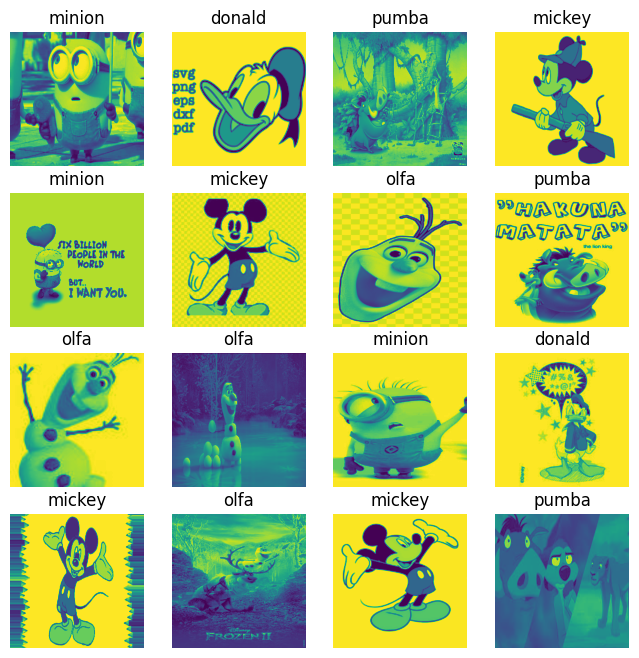

In [16]:
labels = ['donald','mickey','minion','olfa','pooh','pumba']
plt.figure(figsize=(8,8))
for i in range (16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_data[i])
    plt.title(labels[Y_data[i]])
    plt.axis('off')

In [19]:
X_data[0].shape

(300, 300, 1)

In [20]:
X_data.shape[0]

3521

In [21]:
X_train = X_data.reshape(X_data.shape[0],300,300,1)

In [22]:
Y_train = to_categorical(Y_data,num_classes=6)

In [23]:
cnn = Sequential([Conv2D(50,(2,2),activation='relu',input_shape=(300,300,1)),
                  MaxPooling2D(2,2),
                  Conv2D(50,(2,2),activation='relu',input_shape=(300,300,1)),
                  MaxPooling2D(2,2),
                  Flatten(),
                  Dense(20,activation='relu'),
                  Dense(40,activation='relu'),
                  Dense(6,activation='softmax')])

c:\Users\Brijesh AH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
cnn.compile(optimizer='adam', 
            loss="categorical_crossentropy", 
            metrics=['accuracy','precision', 'recall',])

In [26]:
cnn.fit(X_train,Y_train,epochs=10)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.8707 - loss: 0.4389 - precision: 0.8885 - recall: 0.8552
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.8823 - loss: 0.4137 - precision: 0.8934 - recall: 0.8712
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.8985 - loss: 0.3735 - precision: 0.9077 - recall: 0.8862
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.8947 - loss: 0.3677 - precision: 0.9021 - recall: 0.8898
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.9121 - loss: 0.3330 - precision: 0.9197 - recall: 0.9068
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1201s 11s/step - accuracy: 0.9164 - loss: 0.3093 - precision: 0.9203 - recall: 0.9095
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.9429 - loss: 0.2386 - precision: 0.9460 - recall: 0.9400
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.9373 - loss: 0.2430 - precision: 0.9418 - recall: 0.9350
Epoch 

In [27]:
a = X_data[1].reshape(1,300,300,1)
prediction = cnn.predict(a)
labels[np.argmax(prediction)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


'donald'

(-0.5, 299.5, 299.5, -0.5)

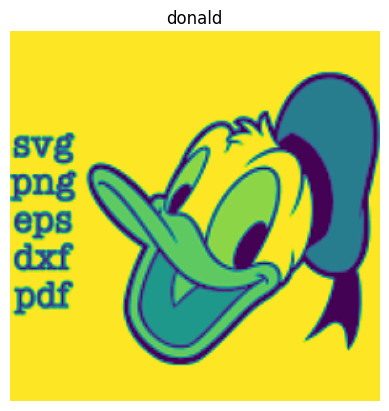

In [28]:
plt.imshow(X_data[1])
plt.title(labels[Y_data[1]])
plt.axis('off')

In [29]:
cnn.save('model.keras')